In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
#Loading the file for further analysis and graphical representation
data = pd.read_csv('/content/drive/MyDrive/NFT_twitter/Submission_twint_1_year/data.csv') 

We first collect and graphically represent the result from sentiment analysis. 
The total count of sentiment on each day is plotted against the time for which we have scraped the data from twitter. A POSITIVE result from sentiment analysis is plotted along positve-Y direction and a NEGATIVE/ NEUTRAL result is shown in the negative-Y axis. Result of Sentiment analysis using both the Hugging Face and Text Blob is shown in the following two plots:  

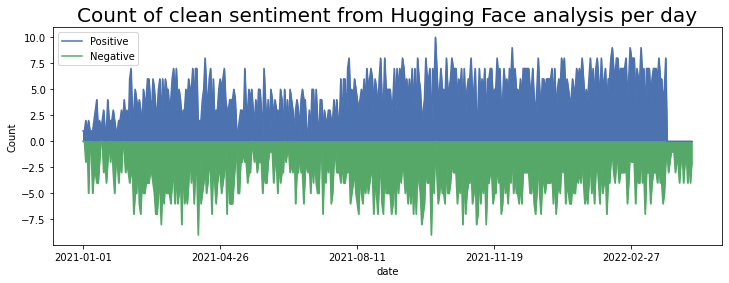

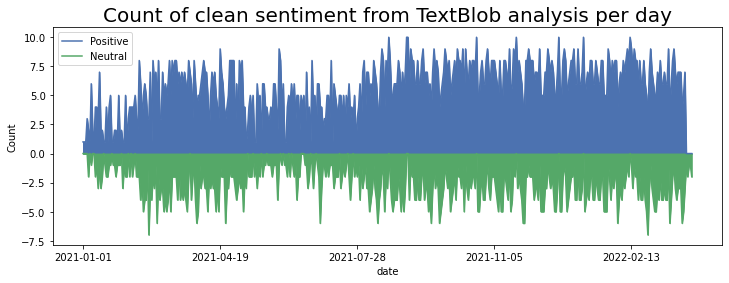

In [5]:
Plt_data0= data[['date','Clean_Sentiment_HF']]
Pcounts= Plt_data0.loc[Plt_data0['Clean_Sentiment_HF'] =='POSITIVE']
Ncounts= Plt_data0.loc[Plt_data0['Clean_Sentiment_HF'] =='NEGATIVE']
X=Pcounts.groupby('date').count()
Y=Ncounts.groupby('date').count()
df1= pd.concat([X, Y,], axis=1,ignore_index = True)
df1[1]=df1[1]*-1

#Plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
fig, axs = plt.subplots(figsize=(12, 4))
df1.plot.area(ax=axs)
axs.set_ylabel("Count")
fig = plt.gcf()
plt.legend(['Positive','Negative'])
plt.title('Count of clean sentiment from Hugging Face analysis per day',
          fontsize=20,
          color="black")
plt.show()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Count of clean sentiment (TB) per day.png', dpi=100)

#---------------------------------------------------------------------------#

Plt_data1= data[['date','Clean_Sentiment_TB']]
Pcounts= Plt_data1.loc[Plt_data1['Clean_Sentiment_TB'] =='POSITIVE']
Ncounts= Plt_data1.loc[Plt_data1['Clean_Sentiment_TB'] =='NEUTRAL']
X=Pcounts.groupby('date').count()
Y=Ncounts.groupby('date').count()
df1= pd.concat([X, Y,], axis=1,ignore_index = True)
df1[1]=df1[1]*-1

#Plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
fig, axs = plt.subplots(figsize=(12, 4))
df1.plot.area(ax=axs)
axs.set_ylabel("Count")
fig = plt.gcf()
plt.legend(['Positive','Neutral'])
plt.title('Count of clean sentiment from TextBlob analysis per day',
          fontsize=20,
          color="black")
plt.show()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Count of clean sentiment (HF) per day.png', dpi=100)



---



---



#Analysis on users who made it to daily top ten trending tweets most frequently:
From the unique users that made to daily top 10 tweets we find the ones who were most frequent in this list. 


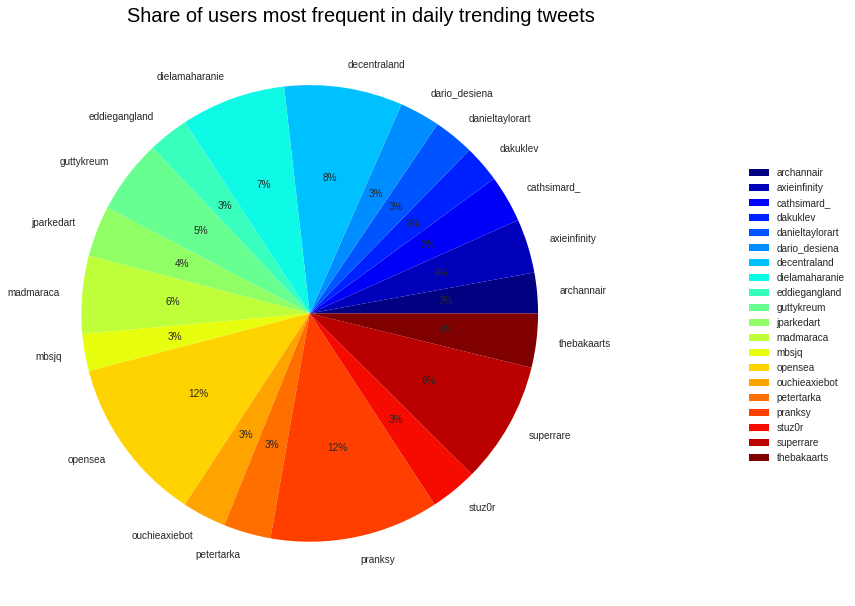

In [6]:
n = 20  #Changing this n can get us corresponding analysis in following sections, here we use top 20 users
top_20_users = data['username'].value_counts()[:n]
dataframe=pd.DataFrame(top_20_users)

# Plotting the pie chart for above dataframe to identify the share of each users who are most frequent in daily trending tweets
plt.style.use('seaborn-dark')
colors = plt.cm.jet(np.linspace(0,1,n))
dataframe.groupby(top_20_users.index.values).sum().plot(kind='pie', y='username', autopct='%1.0f%%',colors=colors)

plt.legend( bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.ylabel('')
plt.title('Share of users most frequent in daily trending tweets',
          fontsize=20,
          color="black",loc='right')
fig = plt.gcf()
fig.set_size_inches(15.5, 10.5)
fig.savefig('Share of users most frequent in daily trending tweets.png', dpi=100)

We note that pranksy and opensea made it to daily top trending tweets most frequently



---



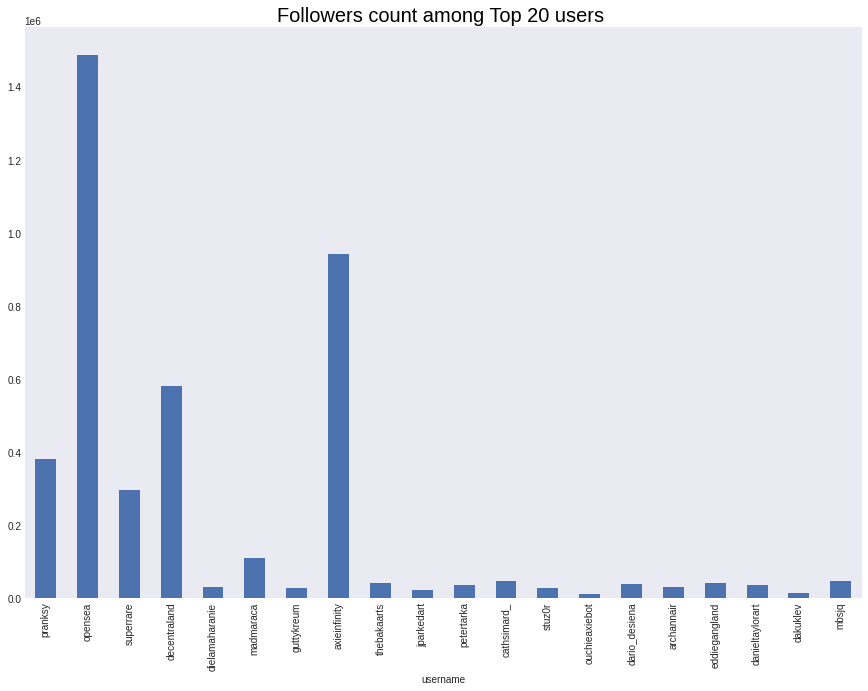

In [7]:
#The number of followers for each of the top 20 users is collected and plotted
topuser_followers=[]
for i in top_20_users.index.values:
  i=data.loc[data['username'] == i]
  i=i['followers'].iloc[0]
  topuser_followers.append(i)
topuser_followers=pd.DataFrame(topuser_followers)
topuser_followers['username']=top_20_users.index.values
followers=topuser_followers.iloc[:, 0]
topuser_followers['followers']=followers


#Plot

topuser_followers.plot(x='username',y='followers',kind='bar')
plt.title('Followers count among Top 20 users ',
          fontsize=20,
          color="black")
plt.legend('')
fig = plt.gcf()
fig.set_size_inches(15, 10.5)
fig.savefig('Followers count among Top 20 users.png', dpi=100)

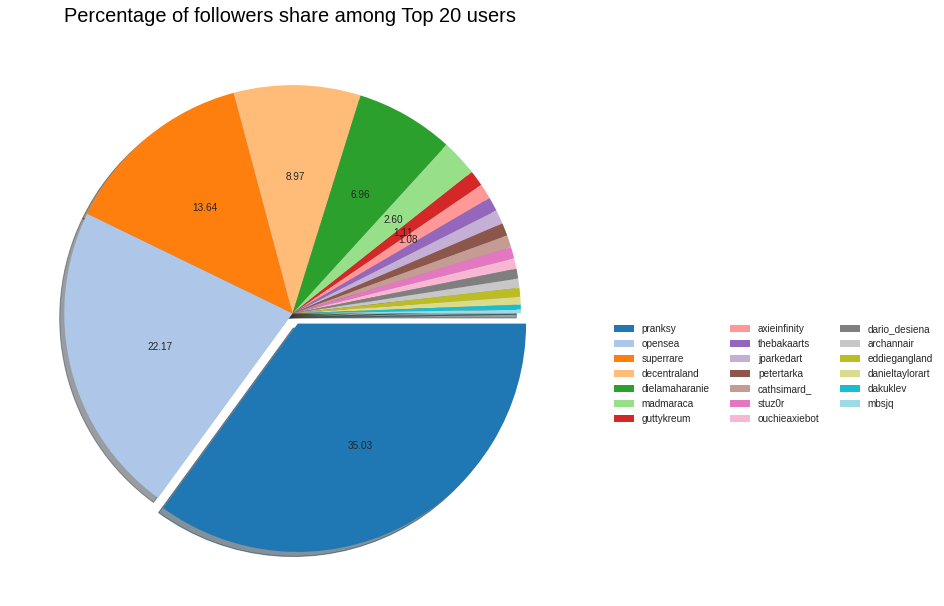

In [8]:
df = pd.DataFrame(topuser_followers)
df=df.sort_values(by=['followers'], ascending=False)
labels = top_20_users.index.values
n = 20
out=[0.05]
zeros=np.zeros(n-1)
explode = [*out,*zeros]
colors = plt.cm.tab20(np.linspace(0,1,n))
plt.pie(df['followers'], colors=colors, labels= None,explode=explode,autopct=lambda p: format(p, '.2f') if p > 1 else None,counterclock=False, shadow=True)

plt.legend( labels,bbox_to_anchor=(1,0.5), ncol=len(df.columns),fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.title('Percentage of followers share among Top 20 users ',
          fontsize=20,
          color="black")
plt.ylabel('')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Followers share among Top 20 users.png', dpi=100)
plt.show()

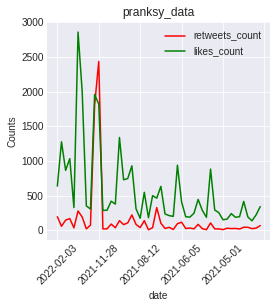

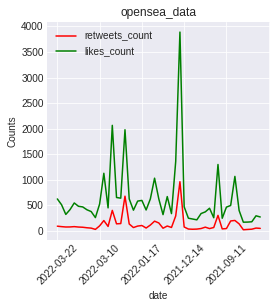

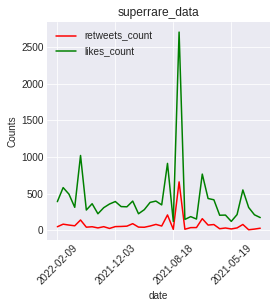

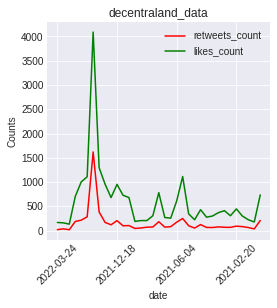

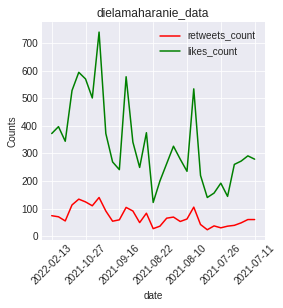

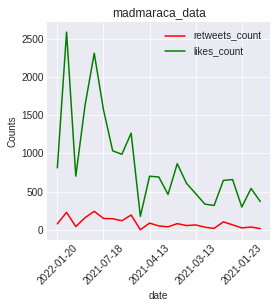

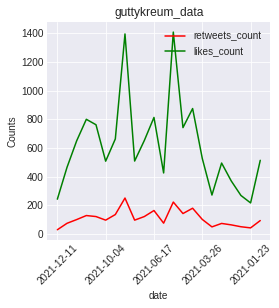

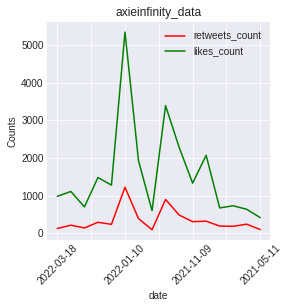

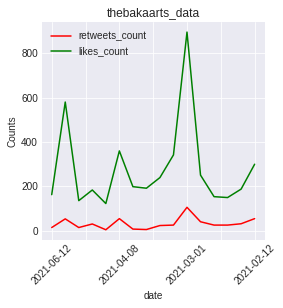

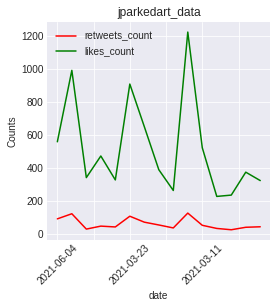

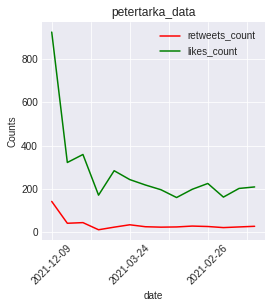

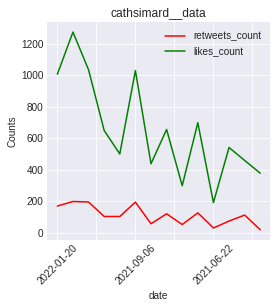

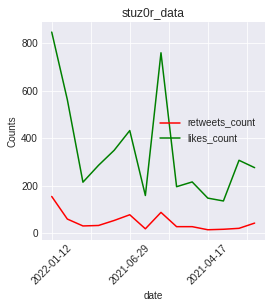

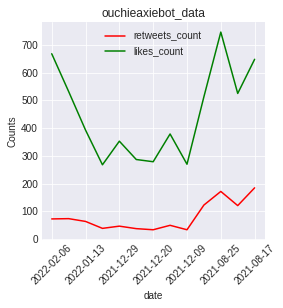

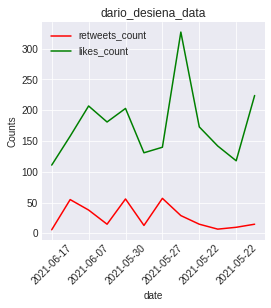

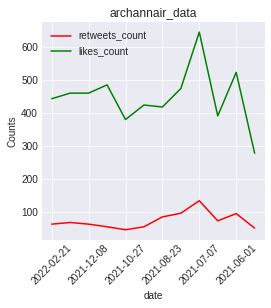

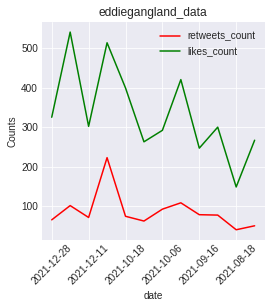

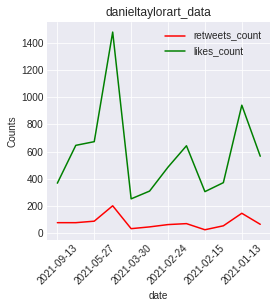

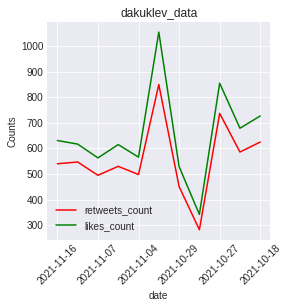

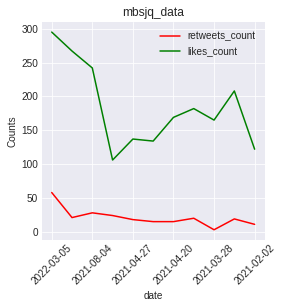

In [9]:
#Plotting the retweets likes and replies count of each of the top 20 users
for i in top_20_users.index.values:
  df=data.loc[data['username'] == i]
  df=df[['date','retweets_count','likes_count']]
  df.plot(x='date',subplots=False, layout=(1,2), title=i+'_data', sharey=True,label=['Retweet','Likes'],color=['red','green'], figsize=(4, 4))
  plt.xticks(rotation=45)  
  plt.ylabel('Counts')
  plt.grid()



---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


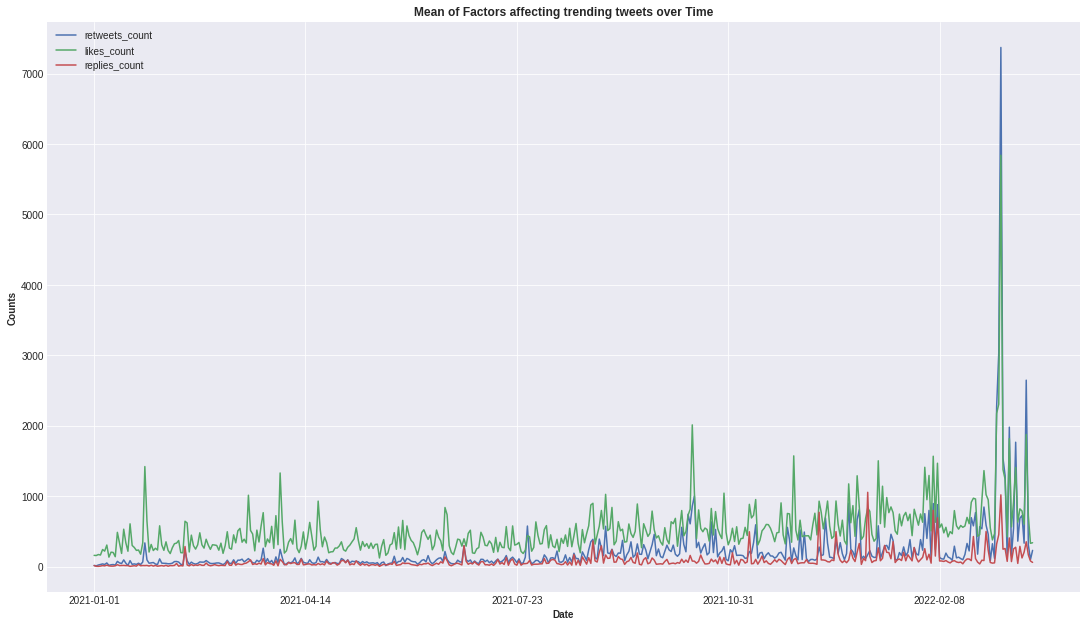

In [11]:
#Plotting the mean of number of  retweets, likes and replies recorded on each day related to NFTs 
mean=data.groupby('date')['retweets_count','likes_count','replies_count'].mean()

#Plot

plt.style.use('seaborn-deep')
mean.plot()
plt.title('Mean of Factors affecting trending tweets over Time',fontweight="bold")
plt.xlabel('Date',fontweight="bold")
plt.ylabel('Counts',fontweight="bold")
plt.grid()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Mean of Factors affecting trending tweets over Time.png', dpi=100)



---
Finding the Location of most frequent tweets related to NFTs and its promotion. Focusing on these location or similar analysis can help in future modeling and NFT valuation

---



In [12]:
df=pd.DataFrame(data['location'])

df.drop(df.loc[df['location']=='Metaverse'].index, inplace=True)
df.drop(df.loc[df['location']=='The Ether'].index, inplace=True)
df.drop(df.loc[df['location']=='Ethereum'].index, inplace=True)
df.drop(df.loc[df['location']=='Mars'].index, inplace=True)
df.drop(df.loc[df['location']=='discord.gg/axie'].index, inplace=True)
n = 20
top_locs = df['location'].value_counts()[:n]
df=pd.DataFrame(top_locs)


In [13]:
! pip install geopy

In [14]:
# Import the required library
lon=[]
lat=[]
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")
for i in df.index.values:
  loc = geolocator.geocode(i)
  lat.append(loc.latitude)
  lon.append(loc.longitude)

lon=pd.DataFrame(lon)
lat=pd.DataFrame(lat)
lon.columns= ['longitude']
lat.columns= ['latitude']

df.columns=['count']
df=pd.DataFrame(df)
df1=df['count']
df1=df1.reset_index(drop=True)

location=pd.concat([lat,lon],axis=1)
location['place']=df.index.values
location['freq']=df1

In [15]:
! pip install geopandas

     |████████████████████████████████| 1.0 MB 11.5 MB/s 
     |████████████████████████████████| 16.7 MB 59.3 MB/s 
     |████████████████████████████████| 6.3 MB 58.4 MB/s 


Plotting the loction from which tweets related to NFTs were most frequent. These locations are marked on world map accordingly

In [16]:
import plotly.express as px
df = location
fig = px.scatter_geo(df, lat='latitude', lon='longitude',
                     color='place', # which column to use to set the color of markers
                     hover_name="place", # column added to hover information
                     size="freq", # size of markers
                     projection="natural earth",title="Location of most frequent tweets related to NFTs")
fig.show()



---





---

#Loading the data from opensea on NFT sales and value of ETH in USD 

---



In [17]:
price=pd.read_csv('/content/drive/MyDrive/NFT_twitter/Submission_twint_1_year/opensea_collection_final_data.csv')
eth=pd.read_csv('/content/drive/MyDrive/NFT_twitter/Submission_twint_1_year/ETH-USD.csv')
df = price[price['Average_price'].notna()]

In [18]:
eth['date'] = eth['Date']
ethdf = pd.merge(df, eth, on='date', how='outer')
ethdf=ethdf.dropna(subset = ['urls'])
ethdf['value in USD']=ethdf['Average_price'].mul(ethdf['Adj Close'])

##Cleaning

In [19]:
ethdf0 = ethdf.loc[ethdf["value in USD"] <= 50000]
ethdf0=pd.DataFrame(ethdf0)

In [20]:
ethdf0.to_csv('/content/drive/MyDrive/NFT_twitter/Submission_twint_1_year/eth_data_in USD')



---



##Plots from ETH data

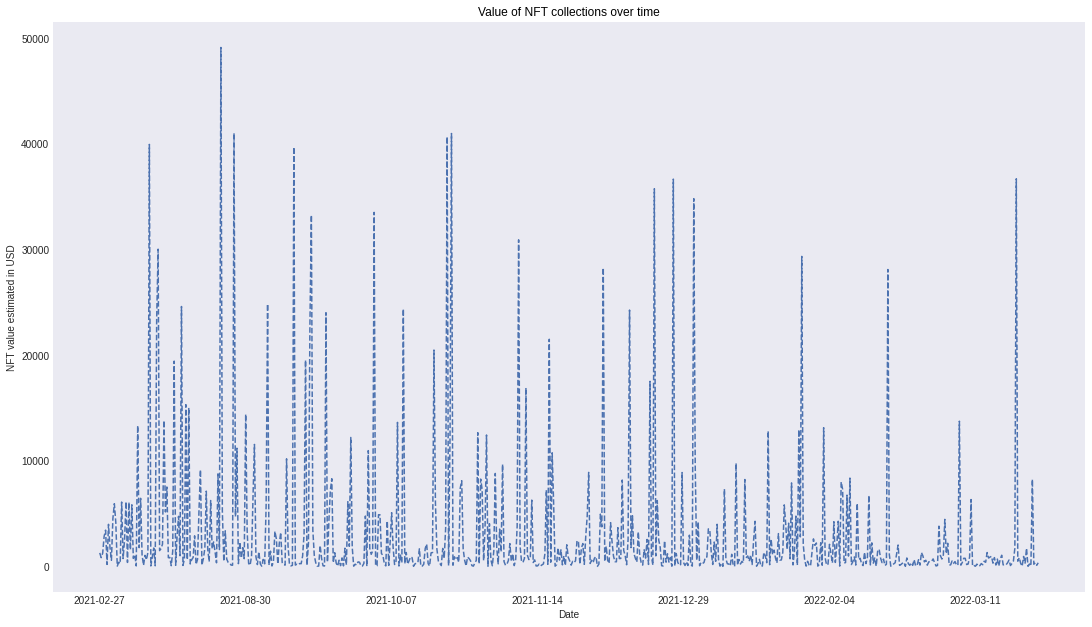

In [21]:
#Plotting the value of NFTs in USD on a daily basis
ethdf1=ethdf0[['Date','value in USD']]
ethdf1=ethdf1.sort_values('Date')
ethdf1.plot(x='Date',y='value in USD',style='--')
plt.ylabel('NFT value estimated in USD')
plt.title('Value of NFT collections over time',color='black')
plt.legend('')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Value of NFT collections over time.png', dpi=100)

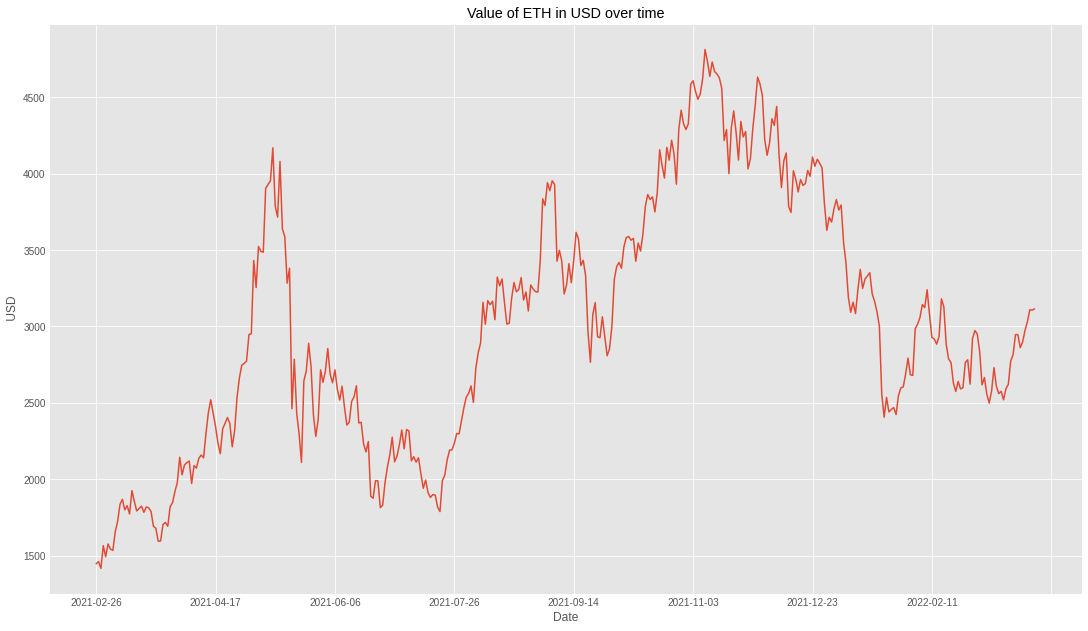

In [23]:
#Ploting the ETH value in USD 
plt.style.use('ggplot')
eth.plot(x='Date',y='Adj Close')
plt.ylabel(' USD')
plt.title('Value of ETH in USD over time',color='black')
plt.legend('')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


Users are divided into two section of Verified and Non-verified based on the Twitter user id status. We aim to look whether promotion from a verified user has more influence over NFT sales

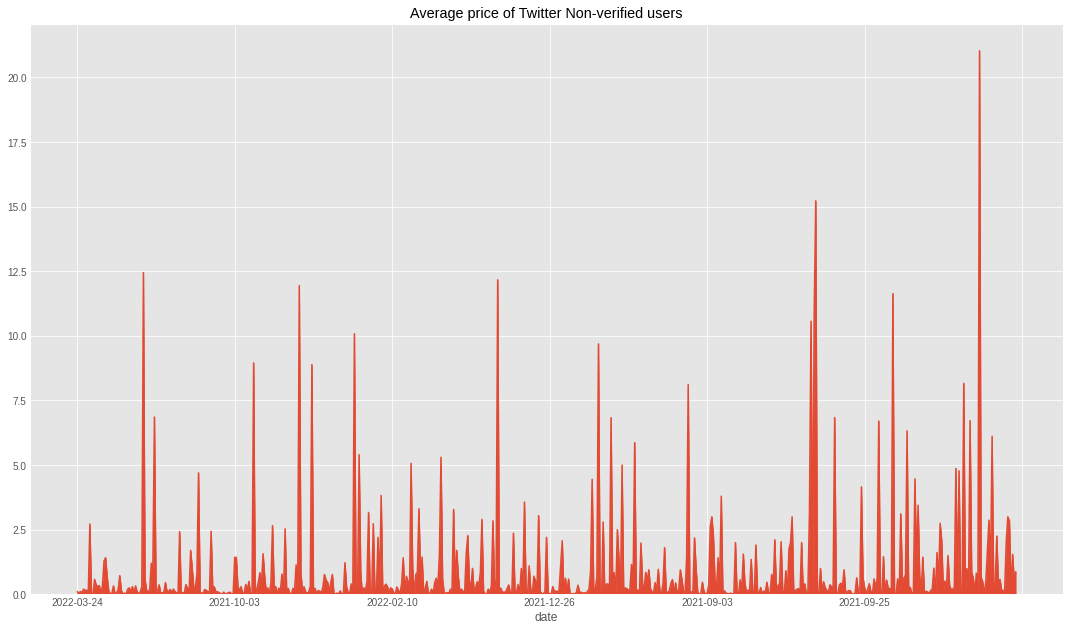

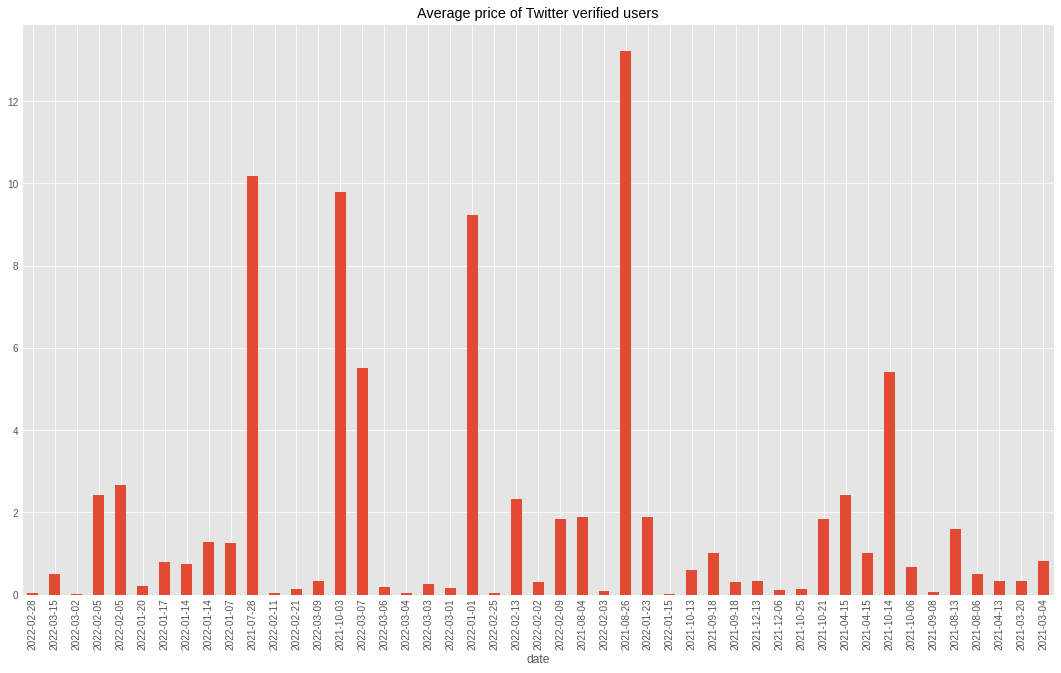

In [24]:
#Plotting the Average price of NFTs of users after categorising them into verified and non-verified users
ethdf2=ethdf0[['date','verified','Average_price']]
ethdf2.groupby('date')
verifiedf=ethdf2[ethdf2['verified']==False]
verifiedt=ethdf2[ethdf2['verified']==True]


#Plot

plt.style.use('ggplot')
verifiedf.plot(x='date',y='Average_price',kind='area')

plt.legend('')
fig = plt.gcf()
plt.title('Average price of Twitter Non-verified users',color='black')
fig.set_size_inches(18.5, 10.5)
fig.savefig('Average price of Twitter Non-verified users.png', dpi=100)

#Plot
plt.style.use('ggplot')
verifiedt.plot(x='date',kind='bar')
plt.legend('')
fig = plt.gcf()
plt.title('Average price of Twitter verified users',color='black')
fig.set_size_inches(18.5, 10.5)

fig.savefig('Average price of Twitter verified users.png', dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



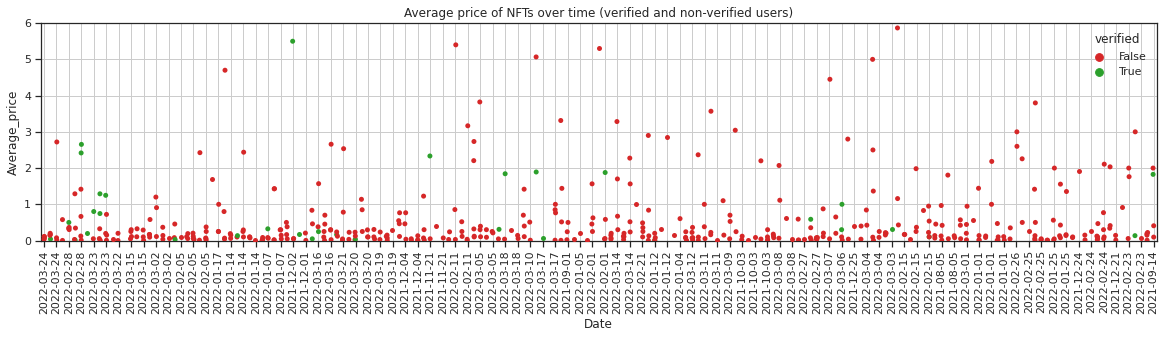

In [25]:
# A scatter plot on average selling price of NFTs over time. Color coding verified and non-verified users.
# Number of verified users is comparitively low in the dataframe.

ethdf3=ethdf0[['date','verified','Average_price','media']]
plt_data=ethdf3.head(500)


#Plot

import seaborn as sns
sns.set_theme()
palette = ['tab:red', 'tab:green']
sns.set(style="ticks")
fig, ax = plt.subplots()
sns_plot=sns.stripplot(x="date", y="Average_price",hue="verified",data=plt_data,palette=palette)
plt_data['date'] = pd.to_datetime(plt_data['date'], errors='coerce')
plt.ylim(0,6)

freq = int(2)

ax.set_xticklabels(plt_data.iloc[::freq].date.dt.date,rotation=90)

xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])


fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.title('Average price of NFTs over time (verified and non-verified users)')
plt.xlabel('Date')
plt.grid()
fig.savefig('Average price of NFTs over time (verified and non-verified users).png', dpi=100)





---

#Finding the correlation between different features affecting NFT price

---

From the correlation values between different features a plot of correlation matrix is also done with a heat map

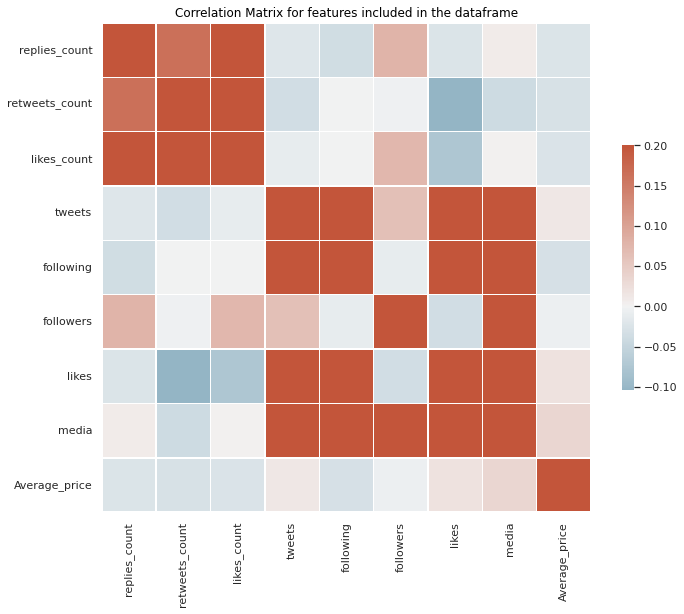

In [26]:
corr_df=ethdf0.drop(['Open','High','Low','Close','Volume','Adj Close','id','Clean_Score','Score','date','value in USD'], axis = 1)
corr=corr_df.corr()

##PLOT
import seaborn as sns
corr=corr_df.corr()
sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap

plt.title('Correlation Matrix for features included in the dataframe',color='black')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Updating the correlation matrix after adding the categorical variable "VERIFIED" from Twitter id as a feature

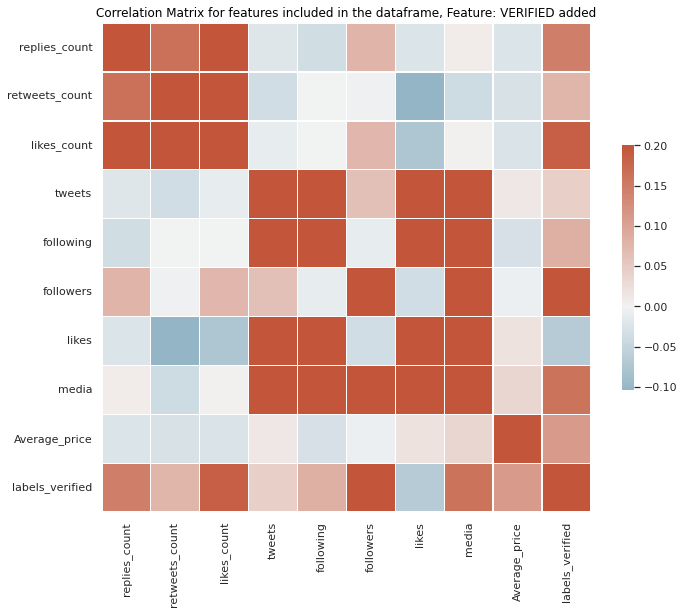

In [27]:
from pandas import factorize

labels, categories = factorize(corr_df["verified"])
corr_df["labels_verified"] = labels
corr_df = corr_df[corr_df['labels_verified'].notna()]


##PLOT
corr=corr_df.corr()
sns.set_theme(style="white")


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Correlation Matrix for features included in the dataframe, Feature: VERIFIED added',color='black')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Updating the correlation matrix after adding the categorical variable "SENTIMENT" from sentiment analysis as a feature

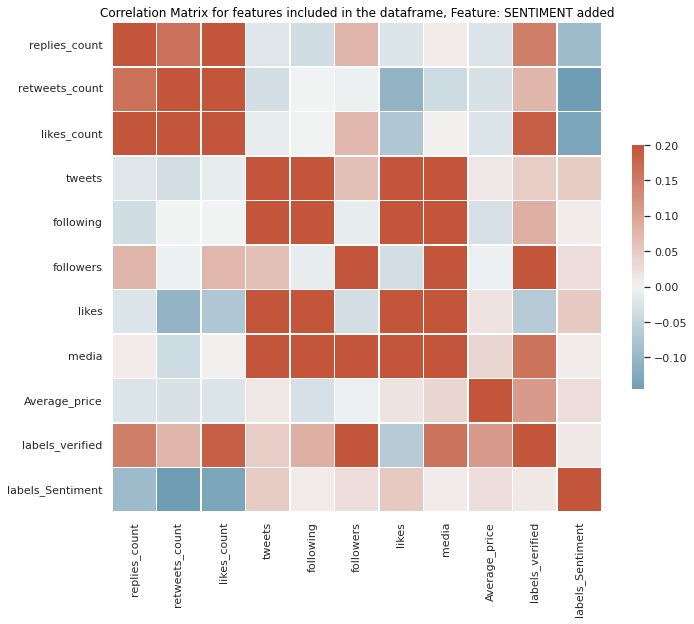

In [28]:
from pandas import factorize

labels, categories = factorize(corr_df["Clean_Sentiment"])
corr_df["labels_Sentiment"] = labels


##PLOT
corr=corr_df.corr()
sns.set_theme(style="white")


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Correlation Matrix for features included in the dataframe, Feature: SENTIMENT added',color='black')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We note that Media and Verified status on Twitter are related to Average price more significantly compared to other features in the dataframe.



---



---

